In [5]:
# Firstname Lastname
# abc123

## Lab 4B

Lab 4 consists of two exercises on reading in data from external CSV and JSON files into Pandas DataFrames.

### Tasks

In this exercise, you will analyze in 2019 data on FIFA soccer players' data. You will read in these data in the ```fifa2019.csv``` CSV file data into a Pandas dataframe. The tasks are:

1. Clean the data
2. First analysis - Overall rating versus wage
3. Second analysis - Overall rating per club
4. Third analysis - Distribution of wages in highest waged clubs

More information is provided below on each of these tasks. 

#### Clean the Data

Read the ```fifa2019.csv``` capturing only the ```ID```, ```Club```, ```Overall```, ```Wage```, ```Position``` columns into a Pandas dataframe. 

Clean the data in the following manner:

1. ```Wage``` is a monetary amount shown in Euros (€). Wages also include ```K``` to represent thousands of Euros. Remove the ```'K'``` from the string.

2. Remove any player who does not belong to a club and any player who makes 0 Euros in ```Wage```. Players that aren't assigned to a club are the same players who make 0 Euros. 

3. Ultimately, the ```Overall``` and ```Wage``` should be integers. 

#### First Analysis

Investigate the relationship between a player's ```Overall``` rating compared to their ```Wage```. Plot this data as a scatterplot with the x axis representing the ```Overall``` rating and the y axis representing the ```Wage``` (in 100Ks).

#### Second Analysis

Investigate the data based on the club in terms of average ```Overall``` rating of all players in that club. Plot these data as a bar graph for the top 10 clubs in terms of average ```Overall``` rating. The x axis will be the ```Club```. The y axis will be the average ```Overall``` in <strong>descending</strong> order, which will help you determine the highest valued teams in terms of their players. 

This task will require you to group the ```DataFrame``` by ```Club```. You may also need to create a new ```DataFrame``` for to create this plot. 

#### Third Analysis

Investigate the distribution of salaries for the top 10 clubs in terms of average ```Wage```. 
You may need to create a new ```DataFrame``` to create this plot. Plot these data on scatterplot or stripplot on top of a boxplot to show the distribution of data. The y axis will be the ```Club``` while the x axis will be the ```Wage```. 

This task will require you to group the ```DataFrame``` by ```Club```. You may also need to create a new ```DataFrame``` for to create this plot. 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
def clean_data(filename):
    """
    Clean and pre-process the FIFA soccer players data.
    
    Parameters:
        filename (str): The path and name of the csv file to be cleaned.
        
    Returns:
        DataFrame: The cleaned and pre-processed dataframe.
    """
    # Read the csv file and capture only the specified columns
    df = pd.read_csv(filename, usecols=["sofifa_id", "club_name", "overall", "wage_eur", "player_positions"])
    
    # Remove K from Wage column
    df["wage_eur"] = df["wage_eur"] * 1000
    
    # Remove players who do not belong to a club or who make 0 Euros in Wage
    df = df[df["club_name"].notnull() & (df["wage_eur"] != 0.0)].reset_index(drop=True)
    
    # Convert Overall and Wage to integers
    df["overall"] = df["overall"].astype(int)
    df["wage_eur"] = df["wage_eur"].astype(int)
    
    return df

df = clean_data('players_22.csv')

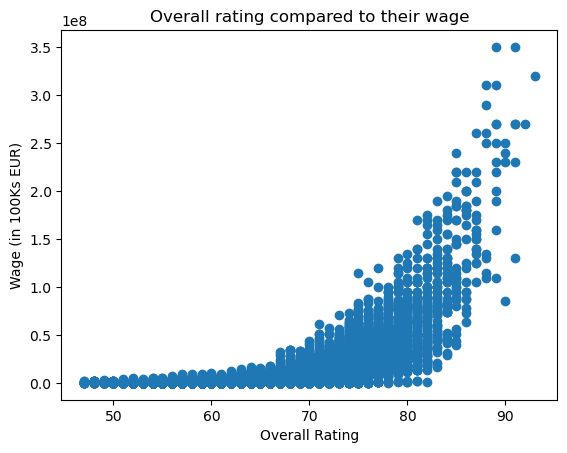

In [8]:
# First analysis plot goes here:  Overall rating compared to their wage
plt.scatter(df["overall"], df["wage_eur"])
plt.xlabel("Overall Rating")
plt.ylabel("Wage (in 100Ks EUR)")
plt.title("Overall rating compared to their wage")
plt.show()

C:\Users\erios\AppData\Local\Temp\ipykernel_17888\1882948546.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  club_overall = df.groupby("club_name").mean().sort_values("overall", ascending=False)["overall"]


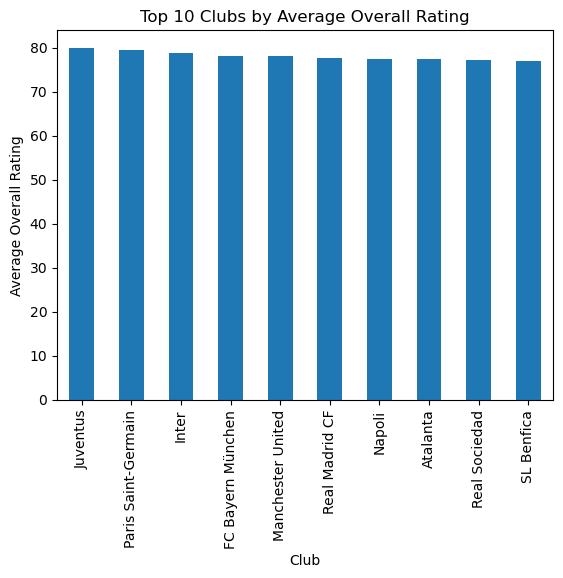

In [9]:
# Second analysis plot goes here:  Wage and Value of all players by club
club_overall = df.groupby("club_name").mean().sort_values("overall", ascending=False)["overall"]

club_overall[:10].plot(kind="bar")
plt.xlabel("Club")
plt.ylabel("Average Overall Rating")
plt.title("Top 10 Clubs by Average Overall Rating")
plt.show()

C:\Users\erios\AppData\Local\Temp\ipykernel_17888\1758861441.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  club_wage = df.groupby("club_name").mean().sort_values("wage_eur", ascending=False)["wage_eur"]


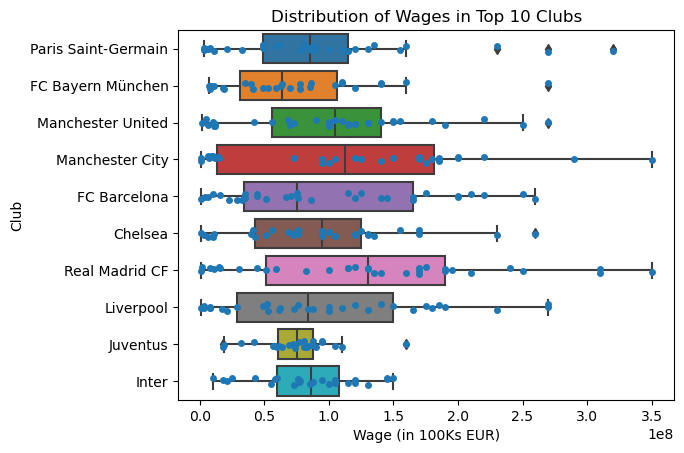

In [10]:
# Third analysis plot goes here:  Distribution of wages by club
club_wage = df.groupby("club_name").mean().sort_values("wage_eur", ascending=False)["wage_eur"]

# Select the top 10 clubs in terms of average Wage
top_clubs = club_wage[:10].index

# Create a new DataFrame with only the top 10 clubs
top_clubs_df = df[df["club_name"].isin(top_clubs)]

# Plot the distribution of wages for the top 10 clubs using a boxplot and stripplot
sns.boxplot(x="wage_eur", y="club_name", data=top_clubs_df)
sns.stripplot(x="wage_eur", y="club_name", data=top_clubs_df, jitter=True)
plt.xlabel("Wage (in 100Ks EUR)")
plt.ylabel("Club")
plt.title("Distribution of Wages in Top 10 Clubs")
plt.show()

## Questions

1. What is the relationship between a player's Overall rating compared to their Wage? Is there any significant relationship between a player's rating and their wage?

2. Which clubs has the highest player Overall ratings on average? Find some information on one of the top three clubs in the barplot and report any information about the success of those clubs around 2019. 

3. Which clubs have the smallest and largest distribution in terms of wages? Are there any extreme outliers in this data? What information can you find about those outliers in terms of how extreme their wages are compared to the rest of the club?

## Answers

Enter your responses here